1. Tiny Data 만들기

종교와 소득의 관계를 나타냄.
wide data -> long data

각 변수(칼럼)는 각각의 열에 분리, 배치

각 관측치는 각각의 행에 분리, 배치

In [2]:
import pandas as pd

df = pd.read_csv("./data/pew.csv")
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [4]:
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [5]:
df.tail()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
13,Orthodox,13,17,23,32,32,47,38,42,46,73
14,Other Christian,9,7,11,13,13,14,18,14,12,18
15,Other Faiths,20,33,40,46,49,63,46,40,41,71
16,Other World Religions,5,2,3,4,2,7,3,4,4,8
17,Unaffiliated,217,299,374,365,341,528,407,321,258,597


In [7]:
df.melt(id_vars='religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


# melt

id_vars: 유지할 변수 리스트(튜플, 행렬)

value_vars: 피봇 되돌리기 값으로 쓰일 열 목록

var_name: 만들어지는 새 컬럼의 이름

value_name: 새 컬럼의 값의 컬럼 이름

In [9]:
df.melt(id_vars='religion',value_name="count",var_name='income')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [11]:
df = pd.read_csv('./data/billboard.csv')

In [12]:
df

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
vars_list = ['year','artist','track','time','date.entered']

In [19]:
df = df.melt(id_vars= vars_list,
             var_name='week',
             value_name='rating')

In [20]:
df

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [21]:
df3 = pd.read_csv("./data/country_timeseries.csv")
df3

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df3.iloc[:5,[0,1,2,10]]

,Date,Day,Cases_Guinea,Deaths_Guinea
0,1/5/2015,289,2776.0,1786.0
1,1/4/2015,288,2775.0,1781.0
2,1/3/2015,287,2769.0,1767.0
3,1/2/2015,286,NaN,NaN
4,12/31/2014,284,2730.0,1739.0


In [25]:
# 값 Case~, Death~ id: Date, Day
df4 = df3.melt(id_vars=['Date','Day'])
df4

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [26]:
type(df4['variable'].str.split('_'))

pandas.core.series.Series

In [28]:
df5 = df4['variable'].str.split('_')
df5

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [30]:
df5[0][0]

'Cases'

In [ ]:
df6 = df5.str.get(0) # cases
df7 = df5.str.get(1) # country

In [34]:
df6

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [ ]:
# 컬럼을 추가
df4['country']=df7
df4['cases']=df6

In [36]:
df4

,Date,Day,variable,value,country,cases
0,1/5/2015,289,Cases_Guinea,2776.0,Guinea,Cases
1,1/4/2015,288,Cases_Guinea,2775.0,Guinea,Cases
2,1/3/2015,287,Cases_Guinea,2769.0,Guinea,Cases
3,1/2/2015,286,Cases_Guinea,NaN,Guinea,Cases
4,12/31/2014,284,Cases_Guinea,2730.0,Guinea,Cases
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Mali,Deaths
1948,3/26/2014,4,Deaths_Mali,NaN,Mali,Deaths
1949,3/25/2014,3,Deaths_Mali,NaN,Mali,Deaths
1950,3/24/2014,2,Deaths_Mali,NaN,Mali,Deaths


In [37]:
df1 = df.melt()


In [47]:
df7 = pd.read_csv('./data/weather.csv') 
df7

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [48]:
df8 = df7.melt(id_vars=['id','year','month','element'],
               var_name='day',
               value_name='temp')
df8.head(10)

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
5,MX17004,2010,3,tmin,d1,NaN
6,MX17004,2010,4,tmax,d1,NaN
7,MX17004,2010,4,tmin,d1,NaN
8,MX17004,2010,5,tmax,d1,NaN
9,MX17004,2010,5,tmin,d1,NaN


In [50]:
df9 = df8.pivot_table(index=['id','year','month','day'],
                columns='element',
                values='temp')
df9

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [52]:
df10 = df9.reset_index()
df10

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [53]:
df10.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


In [54]:
# 메소드 체이닝

In [ ]:
## apply() : 함수적용하기, 함수를 데이터프레임,시리즈에 적용하기

# 사용자 정의함수 만들기
def my_sq(x):
    return x ** 2

# 데이터 프에임.aaply(my_sq)
df = pd.DataFrame({'a':[10,20,30],
                'b':[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [58]:
my_sq(df['a'])

0    100
1    400
2    900
Name: a, dtype: int64

In [59]:
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [61]:
df.iloc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [63]:
def exp(x,e):
    return x** e

In [65]:
df['a'].apply(exp,e=3)

0     1000
1     8000
2    27000
Name: a, dtype: int64

In [66]:
def print_me(x):
    print(x)
    print(type(x))

In [68]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
<class 'pandas.core.series.Series'>
0    20
1    30
2    40
Name: b, dtype: int64
<class 'pandas.core.series.Series'>


a    None
b    None
dtype: object

In [69]:
df.apply(print_me,axis=1)

a    10
b    20
Name: 0, dtype: int64
<class 'pandas.core.series.Series'>
a    20
b    30
Name: 1, dtype: int64
<class 'pandas.core.series.Series'>
a    30
b    40
Name: 2, dtype: int64
<class 'pandas.core.series.Series'>


0    None
1    None
2    None
dtype: object

In [70]:
import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25    5000
1      Bob   45    7000
2  Charlie   35    6500
3    David   32    5500
4      Eva   28    6000


In [74]:
def age_category(age):
    if age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    else:
        return'40대이상'
    
aa= df["Age"].apply(age_category)

df['category'] = aa
    

In [75]:
df

,Name,Age,Salary,category
0,Alice,25,5000,20대
1,Bob,45,7000,40대이상
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


In [77]:
def bonus(salary):
    return salary*0.2

df["Bonus"] = df["Salary"].apply(bonus) 

In [78]:
df

,Name,Age,Salary,category,Bonus
0,Alice,25,5000,20대,1000.0
1,Bob,45,7000,40대이상,1400.0
2,Charlie,35,6500,30대,1300.0
3,David,32,5500,30대,1100.0
4,Eva,28,6000,20대,1200.0


In [79]:
df["Bonus_1"] = df["Salary"].apply(lambda salary:salary*0.2) 

In [80]:
df

,Name,Age,Salary,category,Bonus,Bonus_1
0,Alice,25,5000,20대,1000.0,1000.0
1,Bob,45,7000,40대이상,1400.0,1400.0
2,Charlie,35,6500,30대,1300.0,1300.0
3,David,32,5500,30대,1100.0,1100.0
4,Eva,28,6000,20대,1200.0,1200.0


# 데이터 결합하기
concat() + axis = 

In [93]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [94]:
total_df = pd.concat([df1,df2,df3],ignore_index=True)

In [95]:
total_df # columns이 동일해야한다.

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [86]:
total_df.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a4,b4,c4,d4
5,1,a5,b5,c5,d5
6,2,a6,b6,c6,d6
7,3,a7,b7,c7,d7
8,0,a8,b8,c8,d8
9,1,a9,b9,c9,d9


In [107]:
add_s = pd.Series(data = ['a100','b100','c100','d100'],
                  index = ['A',"B",'C','D'])
type(add_s)

pandas.core.series.Series

In [106]:
pd.concat([total_df,aa],axis=0)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [103]:
aa = pd.DataFrame(data =[['a100','b100','c100','d100']],
                  columns=['A',"B",'C','D'])

In [109]:
# 열 연결하기

df4 = pd.concat([df1,df2,df3],axis=1)

In [110]:
df4['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [112]:
df4['new']=['a1','a2','a3','a4']

In [113]:
df4

,A,B,C,D,A,B,C,D,A,B,C,D,new
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,a1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,a2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,a3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,a4


In [116]:
a = pd.Series(['a1','a2','a3','a4'])

In [117]:
df4['a'] = a

In [118]:
df4

,A,B,C,D,A,B,C,D,A,B,C,D,new,a
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,a1,a1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,a2,a2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,a3,a3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,a4,a4


# 병합
concat(join='inner','outer')

In [119]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

pd.concat([df1,df2,df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [128]:
pd.concat([df2,df3],join="inner",axis = 'columns' )

,E,F,G,H,A,C,F,H
5,a5,b5,c5,d5,a10,b10,c10,d10
7,a7,b7,c7,d7,a11,b11,c11,d11


In [124]:
df1.index = [0, 1, 2, 3]
df2.index = [4, 5, 6, 7]
df3.index = [0, 2, 5, 7]

In [129]:
pd.concat([df2,df3],join="inner")

,F,H
4,b4,d4
5,b5,d5
6,b6,d6
7,b7,d7
0,c8,d8
2,c9,d9
5,c10,d10
7,c11,d11


In [130]:
import pandas as pd

# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

In [133]:
pd.concat([january,february],join="inner",ignore_index=True )

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
2,2023-02-01,300
3,2023-02-02,350


In [134]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

In [146]:
st1 = store_a.set_index("Date")
st2 = store_b.set_index("Date")
# pd.concat([store_a,store_b],axis=1)
st3 = pd.concat([st1,st2],axis=1)

In [153]:
st4 = st3.reset_index()

In [160]:
st2 = store_b.set_index("Date")
st2

,Sales_B
Date,
2023-01-01,300
2023-01-02,350


In [154]:
st4

,Date,Sales_A,Sales_B
0,2023-01-01,200,300
1,2023-01-02,250,350


In [155]:
# 상점 C의 매출 데이터
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

# 상점 D의 매출 데이터
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

In [159]:
pd.concat([store_c,store_d])

,Date,Sales_C,Sales_D
0,2023-01-01,220.0,NaN
1,2023-01-03,280.0,NaN
0,2023-01-02,NaN,330.0
1,2023-01-03,NaN,370.0


In [162]:
from pathlib import  Path

In [168]:
data_files = Path('./').glob("data/billboard-by_week/billboard-*.csv")

In [169]:
b_data_files = sorted(list(data_files))
len(b_data_files)

76

In [170]:
[b_data_file for b_data_file in b_data_files]

[WindowsPath('data/billboard-by_week/billboard-01.csv'),
 WindowsPath('data/billboard-by_week/billboard-02.csv'),
 WindowsPath('data/billboard-by_week/billboard-03.csv'),
 WindowsPath('data/billboard-by_week/billboard-04.csv'),
 WindowsPath('data/billboard-by_week/billboard-05.csv'),
 WindowsPath('data/billboard-by_week/billboard-06.csv'),
 WindowsPath('data/billboard-by_week/billboard-07.csv'),
 WindowsPath('data/billboard-by_week/billboard-08.csv'),
 WindowsPath('data/billboard-by_week/billboard-09.csv'),
 WindowsPath('data/billboard-by_week/billboard-10.csv'),
 WindowsPath('data/billboard-by_week/billboard-11.csv'),
 WindowsPath('data/billboard-by_week/billboard-12.csv'),
 WindowsPath('data/billboard-by_week/billboard-13.csv'),
 WindowsPath('data/billboard-by_week/billboard-14.csv'),
 WindowsPath('data/billboard-by_week/billboard-15.csv'),
 WindowsPath('data/billboard-by_week/billboard-16.csv'),
 WindowsPath('data/billboard-by_week/billboard-17.csv'),
 WindowsPath('data/billboard-by

In [171]:
b_data_files[0]

WindowsPath('data/billboard-by_week/billboard-01.csv')

In [172]:
pd.read_csv(b_data_files[0])

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk1,86.0
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk1,85.0
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk1,95.0
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk1,99.0


In [173]:
list_b_df = []
for b_data_file in b_data_files:
    df = pd.read_csv(b_data_file)
    list_b_df.append(df)
    
len(list_b_df)

76

In [174]:
type(list_b_df[0])

pandas.core.frame.DataFrame

In [177]:
list_b_df[3].head(5)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk4,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk4,67.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk4,17.0


In [178]:
final_df = pd.concat(list_b_df)
final_df.shape

(24092, 7)

In [179]:
df = pd.read_csv("./data/gapminder.tsv",sep="\t")

In [180]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [181]:
df['country'].unique().shape  

(142,)

In [182]:
df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

count()
mean()
size()
max,min()
quantile()
describe()
var()
sum()
std()


In [186]:
import numpy as np
df.groupby('continent')['lifeExp'].agg([np.mean,np.min,np.max])

C:\Users\Admin\AppData\Local\Temp\ipykernel_15940\2034519305.py:2: FutureWarning: The provided callable <function mean at 0x0000012E7A75CAE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('continent')['lifeExp'].agg([np.mean,np.min,np.max])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15940\2034519305.py:2: FutureWarning: The provided callable <function min at 0x0000012E7A75C220> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('continent')['lifeExp'].agg([np.mean,np.min,np.max])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15940\2034519305.py:2: FutureWarning: The provided callable <function max at 0x0000012E7A75C0E0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be use

,mean,min,max
continent,,,
Africa,48.865330,23.599,76.442
Americas,64.658737,37.579,80.653
Asia,60.064903,28.801,82.603
Europe,71.903686,43.585,81.757
Oceania,74.326208,69.120,81.235


In [188]:
df.groupby('continent').agg({
    'lifeExp': 'mean',
    'pop': 'median',
    'gdpPercap': 'median'
})

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,1192.138217
Americas,64.658737,6227510.0,5465.509853
Asia,60.064903,14530830.5,2646.786844
Europe,71.903686,8551125.0,12081.749115
Oceania,74.326208,6403491.5,17983.303955


In [1]:
import pandas as pd 

In [65]:
df = pd.read_csv("./data/vehicle_prod.csv",index_col=0)

In [66]:
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
df.rename(columns={'Unnamed: 0':'country'},inplace=True,
df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [41]:
df.set_index('country',inplace=True)

In [42]:
df

,2007,2008,2009,2010,2011
country,,,,,
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [43]:
df['2007'].tolist()

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

In [44]:
df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [45]:
df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [46]:
#변수들가의 값의 볂화의 유사도
#음의상관관계: 서로 다른 방향으로 변화
#양의 상관관계: 서로 같은 방향으로 변화

df['total_production'] = df.sum(axis=1)
df1 = df.reset_index()
df1


,country,2007,2008,2009,2010,2011,total_production
0,China,7.71,7.95,11.96,15.84,16.33,59.79
1,EU,19.02,17.71,15.00,16.70,17.48,85.91
2,US,10.47,8.45,5.58,7.60,8.40,40.50
3,Japan,10.87,10.83,7.55,9.09,7.88,46.22
4,Korea,4.04,3.78,3.45,4.20,4.62,20.09
5,Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [47]:
df.loc['total_production'] = df.sum(axis=0)

In [48]:
df

,2007,2008,2009,2010,2011,total_production
country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total_production,54.12,50.77,45.04,55.68,57.25,262.86


In [52]:
# 시리즈 생성
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

# 데이터프레임 생성
store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se
})

#순수입 컬럼 추가하기
store_df['순수입'] = store_df['수입'] - store_df['지출']
store_df

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


In [64]:
df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


Text(0, 0.5, '')

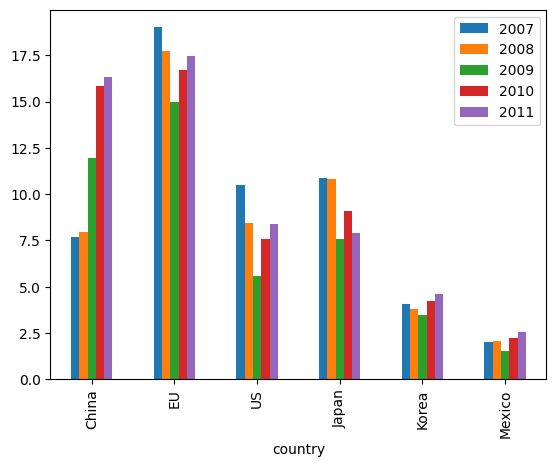

In [67]:
ax = df.plot.bar()
ax.set_xlabel('country')
ax.set_ylabel('')

In [68]:
df.transpose()

,China,EU,US,Japan,Korea,Mexico
2007,7.71,19.02,10.47,10.87,4.04,2.01
2008,7.95,17.71,8.45,10.83,3.78,2.05
2009,11.96,15.00,5.58,7.55,3.45,1.50
2010,15.84,16.70,7.60,9.09,4.20,2.25
2011,16.33,17.48,8.40,7.88,4.62,2.54


In [70]:
# 결측치
import numpy as np
np.nan == 0

False

In [72]:
x = [1,2,np.nan]
x

[1, 2, nan]

In [75]:
import pandas as pd
pd.NA # nan
pd.isna(x)

array([False, False,  True])

In [76]:
pd.NA == np.nan

<NA>

In [77]:
pd.isnull(np.nan)

True

In [78]:
import pandas as pd
import numpy as np

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)

In [79]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [81]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [85]:
# 결측치 제거
df.dropna()

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
df.dropna(subset=['score']) # 해당 컬럼에 결측치가 있는 행을 삭제하는 함수

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [88]:
# 채우기
df['age'].fillna(df['age'].mean())
# 대표값: 평균, 중앙값, 최빈값

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [91]:
df['age'].fillna(df['age'].mode()[0])

0    25.0
1    22.0
2    30.0
3    22.0
4    22.0
Name: age, dtype: float64

In [ ]:
df['score'].fillna(method='ffill') # 직전값 채우기, 직후: bfill

C:\Users\Admin\AppData\Local\Temp\ipykernel_18724\3387885858.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df['age'].mask(df['age'] < 30, 30) # 컬럼의 값의 조건을 주고 대체할때 사용

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [2]:
df = pd.read_csv('./data/titanic.csv')
df

NameError: name 'pd' is not defined

In [3]:
df.isnull().sum()

NameError: name 'df' is not defined

In [4]:
df.info()

NameError: name 'df' is not defined

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

NameError: name 'df' is not defined

In [6]:
df.isnull().sum()

NameError: name 'df' is not defined

In [7]:
df['Age'].plot(kind='hist')

NameError: name 'df' is not defined

In [8]:
df['Cabin'] = df["Cabin"].fillna('X')

NameError: name 'df' is not defined

In [9]:
df

NameError: name 'df' is not defined

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

NameError: name 'df' is not defined

In [26]:
import pandas as pd
df = pd.read_csv("./data/CARD_SUBWAY_MONTH_202102.csv",index_col=False)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303


In [27]:
# 총 몇건인지 코드로 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [28]:
# 평균표준편차, 사분위수, 평균
df.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.675100e+04,16751.000000,16751.000000,1.675100e+04
mean,2.021021e+07,8567.344696,8536.474419,2.021023e+07
std,8.083073e+00,9006.651687,9064.054078,2.749315e+01
min,2.021020e+07,1.000000,0.000000,2.021020e+07
25%,2.021021e+07,2652.500000,2594.500000,2.021021e+07
50%,2.021022e+07,5857.000000,5733.000000,2.021022e+07
75%,2.021022e+07,11257.000000,11117.000000,2.021022e+07
max,2.021023e+07,88904.000000,87891.000000,2.021030e+07


In [34]:
# 몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
print(df['노선명'].value_counts())

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64


In [35]:
# 2호선 만 선택하세요.ㅇ

df[df['노선명']=='2호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
532,20210201,2호선,용두(동대문구청),2365,2430,20210204
533,20210201,2호선,신정네거리,9269,9599,20210204
534,20210201,2호선,양천구청,6318,6738,20210204
535,20210201,2호선,도림천,1434,1469,20210204
536,20210201,2호선,신설동,3046,3110,20210204
...,...,...,...,...,...,...
16207,20210228,2호선,신설동,2806,2830,20210303
16208,20210228,2호선,도림천,480,477,20210303
16209,20210228,2호선,양천구청,3234,3281,20210303
16210,20210228,2호선,신정네거리,4814,4805,20210303


In [39]:
# 승차총 승객수가 50000명 이상인 로우의 역명을 확인하세요

gg = df[df['승차총승객수'] >= 50000]['노선명']
gg=pd.DataFrame(gg)
gg.value_counts()

노선명
2호선    109
Name: count, dtype: int64

In [41]:
# 등록일자 칼럼을 삭제하세요
df.drop(columns=['등록일자'],inplace=True)

In [42]:
# 승차총승객수와 하차총승객수의 차이를 계산한 승하차총 승객수 차이칼럼을 생성

df['승하차총승객수'] = abs(df['승차총승객수'] - df['하차총승객수'])
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수
0,20210201,중앙선,용문,1282,1259,23
1,20210201,중앙선,지평,48,43,5
2,20210201,중앙선,아신,415,413,2
3,20210201,중앙선,양수,1463,1466,3
4,20210201,중앙선,운길산,495,463,32
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20
16747,20210228,중앙선,양평,3299,3187,112
16748,20210228,중앙선,원덕,322,304,18
16749,20210228,중앙선,용문,1899,1716,183


In [43]:
df['하차총승객수'].mean()

np.float64(8536.474419437645)

In [49]:
import random
sample_df=df.sample(10)

In [50]:
sample_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수
914,20210202,9호선,증미,7101,7066,35
16565,20210228,경의선,탄현,3812,3739,73
815,20210202,경원선,회룡,11231,11006,225
14300,20210224,2호선,영등포구청,23111,23129,18
4621,20210208,경인선,인천,2594,1874,720
7303,20210213,4호선,성신여대입구(돈암),9358,9693,335
15392,20210226,경인선,간석,5814,5469,345
14411,20210225,2호선,신정네거리,9794,10322,528
2720,20210205,9호선,사평,3225,3081,144
12114,20210221,경인선,도화,2061,1959,102


In [54]:
sample_df['노선명'] = sample_df['노선명'].replace({'2호선': 'line2', '9호선': 'line9','4호선':'line4'})

In [55]:
sample_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수
914,20210202,line9,증미,7101,7066,35
16565,20210228,경의선,탄현,3812,3739,73
815,20210202,경원선,회룡,11231,11006,225
14300,20210224,line2,영등포구청,23111,23129,18
4621,20210208,경인선,인천,2594,1874,720
7303,20210213,line4,성신여대입구(돈암),9358,9693,335
15392,20210226,경인선,간석,5814,5469,345
14411,20210225,line2,신정네거리,9794,10322,528
2720,20210205,line9,사평,3225,3081,144
12114,20210221,경인선,도화,2061,1959,102


In [56]:
df2 = df.set_index('사용일자')
df2

,노선명,역명,승차총승객수,하차총승객수,승하차총승객수
사용일자,,,,,
20210201,중앙선,용문,1282,1259,23
20210201,중앙선,지평,48,43,5
20210201,중앙선,아신,415,413,2
20210201,중앙선,양수,1463,1466,3
20210201,중앙선,운길산,495,463,32
...,...,...,...,...,...
20210228,중앙선,오빈,216,236,20
20210228,중앙선,양평,3299,3187,112
20210228,중앙선,원덕,322,304,18


In [59]:
def getDate(data):
    dt = str(data)
    yy = dt[0:4]
    mm = dt[4:6]
    dd = dt[6:8]
    
    return yy+'~'+mm+'~'+dd

d = '20210303'
getDate(d) 

'2021~03~03'

In [62]:
df['사용일자'] = pd.to_datetime(df['사용일자'],format="%Y%m%d")

In [65]:
dummies = pd.get_dummies(sample_df['노선명'],prefix='노선').astype(int)
dummies

,노선_line2,노선_line4,노선_line9,노선_경원선,노선_경의선,노선_경인선
914,0,0,1,0,0,0
16565,0,0,0,0,1,0
815,0,0,0,1,0,0
14300,1,0,0,0,0,0
4621,0,0,0,0,0,1
7303,0,1,0,0,0,0
15392,0,0,0,0,0,1
14411,1,0,0,0,0,0
2720,0,0,1,0,0,0
12114,0,0,0,0,0,1


In [66]:
df.groupby(['노선명']).mean(numeric_only=True)

,승차총승객수,하차총승객수,승하차총승객수
노선명,,,
1호선,16711.396429,16224.032143,781.685714
2호선,20258.510000,20406.605714,930.001429
3호선,11563.884739,11542.535752,772.983991
4호선,13839.026099,13953.564560,873.126374
5호선,8774.492588,8727.040431,413.837601
6호선,6499.918173,6405.854424,432.809705
7호선,10210.968487,10060.233193,558.322129
8호선,8356.453782,8425.422269,680.993697
9호선,8110.387143,8246.852857,543.720000
